In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL, seasonal_decompose

In [2]:
df = pd.read_csv('../原始数据集/national_illness.csv')
df.head(2)

,date,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 5-24,ILITOTAL,NUM. OF PROVIDERS,OT
0,2002-01-01 00:00:00,1.22262,1.16668,582,805,2060,754,176569
1,2002-01-08 00:00:00,1.33344,1.21650,683,872,2267,785,186355


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               966 non-null    object 
 1   % WEIGHTED ILI     966 non-null    float64
 2   %UNWEIGHTED ILI    966 non-null    float64
 3   AGE 0-4            966 non-null    int64  
 4   AGE 5-24           966 non-null    int64  
 5   ILITOTAL           966 non-null    int64  
 6   NUM. OF PROVIDERS  966 non-null    int64  
 7   OT                 966 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 60.5+ KB


In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.describe()

,date,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 5-24,ILITOTAL,NUM. OF PROVIDERS,OT
count,966,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,9.660000e+02
mean,2011-04-01 12:00:00,1.851286,1.845240,3434.813665,4981.128364,13540.716356,1608.261905,6.514975e+05
min,2002-01-01 00:00:00,0.351881,0.491507,98.000000,91.000000,318.000000,264.000000,6.469900e+04
25%,2006-08-16 18:00:00,0.971185,0.978537,1487.000000,1667.500000,4915.000000,1238.000000,3.853698e+05
50%,2011-04-01 12:00:00,1.375970,1.359065,2552.000000,3265.500000,9028.500000,1501.500000,6.183050e+05
75%,2015-11-15 06:00:00,2.291583,2.223535,4457.750000,5673.500000,16243.750000,1990.000000,8.134695e+05
max,2020-06-30 00:00:00,7.715100,7.780900,24097.000000,45513.000000,111361.000000,3453.000000,1.640587e+06
std,NaN,1.343042,1.309019,3153.962885,5953.881662,15010.894094,681.580042,3.490189e+05


均值为：651497.460，标准差为：349018.888
KstestResult(statistic=0.08989597106840164, pvalue=3.0452092956108496e-07, statistic_location=855608, statistic_sign=1)
异常值共0条


(-10.0, 1000.0)

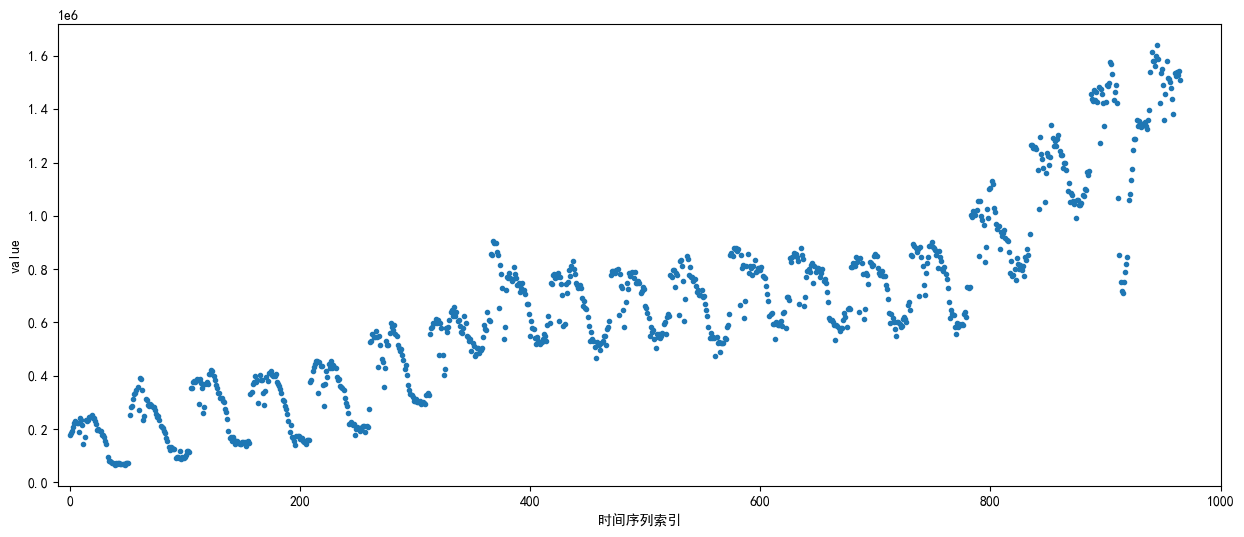

In [7]:
import numpy as np
from scipy import stats


mean = df['OT'].mean()  # 计算均值

std = df['OT'].std()  # 计算标准差

print('均值为：%.3f，标准差为：%.3f' % (mean, std))
print(stats.kstest(df['OT'], 'norm', (mean, std)))


fig, ax = plt.subplots(figsize=(15, 6))

# df['OT'].plot(kind='kde', grid=True, style='-k', title='ETTh1', ax=ax1)

error = df['OT'][np.abs(df['OT'] - mean) > 3 * std]

data_c = df['OT'][np.abs(df['OT'] - mean) <= 3 * std]

print('异常值共%i条' % len(error))

# 筛选出异常值error、剔除异常值之后的数据data_c
plt.rcParams['font.sans-serif'] = ['Kaitt', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False
ax.scatter(data_c.index, data_c, marker='.', alpha=1, label='正常值')

ax.scatter(error.index, error, marker='.', alpha=1, label='异常值')
ax.set_xlabel('时间序列索引')
ax.set_ylabel('value')
ax.set_xlim([-10, 1000])



In [7]:
data = pd.DataFrame(data_c)
error = pd.DataFrame(error)
data.to_csv('output/illness_normal.csv')
error.to_csv('output/illness_error.csv')

In [14]:
import pandas as pd
from pyecharts.charts import Scatter
from pyecharts import options as opts

# 假设你已经有了两个 DataFrame：data 和 error
# 示例：

data = pd.DataFrame(data_c)
error = pd.DataFrame(error)
# 创建散点图对象
scatter = Scatter()

# 添加 data 数据
scatter.add_xaxis(data.index.tolist())
scatter.add_yaxis(
    "正常值", 
    data['OT'].tolist(), 
    symbol_size=10,
    label_opts=opts.LabelOpts(is_show=False)  # 不显示标签
)

# 添加 error 数据
scatter.add_xaxis(error.index.tolist())
scatter.add_yaxis(
    "异常值", 
    error['OT'].tolist(), 
    symbol_size=10, 
    color="red",
    label_opts=opts.LabelOpts(is_show=False)  # 不显示标签
)

# 设置全局选项
scatter.set_global_opts(
    title_opts=opts.TitleOpts(title="正常值与异常值散点图"),
    xaxis_opts=opts.AxisOpts(type_="value", name="索引"),
    yaxis_opts=opts.AxisOpts(type_="value", name="值"),
    tooltip_opts=opts.TooltipOpts(trigger="item", formatter="{a} <br/>{b}: {c}")
)

# 渲染图表
scatter.render("scatter_plot.html")


'd:\\codefiled\\Graduation_Design\\models\\data\\preop\\scatter_plot.html'